In [29]:
from fractions import Fraction
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d, lagrange
import scipy
import scipy.linalg as la 
from sympy import *

from interpolation import monomial, lagrange, newton, cubic_spline
from finite_difference import finite_difference
from fundamental_subspace import fundamental_subspace
from householder import householdersQR
from gram_schmidt import gram_schmidt, projection
from power_method import power_method, power_method_about

np.set_printoptions(suppress=True, formatter={"all": lambda x: str(Fraction(x).limit_denominator())})

def projection_matrix(A):
    return A@np.linalg.inv(np.transpose(A)@A)@np.transpose(A)

def projection_vector(a):
    # s2 onto v1
    return (1/np.linalg.norm(a)**2)*(a*np.transpose(a))
# def inverse_iteration(mat, start, maxit):
#     matinv = np.inv(mat)
#     y1 = matinv@start
#     for i in rang(maxit):
#         xnew = A@ynew

# def eigenvalue(A, eigvec):
#     return np.dot(np.transpose(eigvec), A.dot(eigvec))/np.dot(np.transpose(eigvec), eigvec)

# def inverse_power_method(A, x, maxit):
#     eigenvec = x
#     eigenval = eigenvalue(A, eigenvec)
#     for _ in range(maxit):
#         new_eigenvec = solve(A, eigenvec)
#         new_eigenvec /= np.linalg.norm(new_eigenvec)
#         new_eigenval = eigenvalue(A, new_eigenvec)
#         eigenvec = new_eigenvec
#         eigenval = new_eigenval
#     return eigenvec


#     return


#  npQ, npR = np.linalg.qr(np.matrix([
#     [1, 2, 1],
#     [0, 0, 1],
#     [2, 2, 1],
#     [2, 1, 0]
# ]), "complete")



In [2]:
A = np.matrix([
    [2, 0, 1],
    [4, -2, 3],
    [0, 2, -2],
    [5, 1, 0]])

Q2, R2 = householdersQR(A, 1)

print(R2)


alpha: [[3]]
u: [[0]
 [-5]
 [2]
 [1]]
H: [[1 0 0 0]
 [0 -2/3 2/3 1/3]
 [0 2/3 11/15 -2/15]
 [0 1/3 -2/15 14/15]]
[[2 0 1]
 [-1 3 -10/3]
 [2 0 8/15]
 [6 0 19/15]]


[[-791/400 16027/16000 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3973/4000 -791/400 4027/4000 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 15757/16000 -791/400 16243/16000 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 973/1000 -791/400 1027/1000 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 613/640 -791/400 667/640 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3757/4000 -791/400 4243/4000 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 14677/16000 -791/400 17323/16000 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 223/250 -791/400 277/250 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 13813/16000 -791/400 18187/16000 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 133/160 -791/400 187/160 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 12733/16000 -791/400 19267/16000 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 757/1000 -791/400 1243/1000 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 11437/16000 -791/400 20563/16000 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2677/4000 -791/400 5323/4000 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 397/640 -791/400 883/640 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 71/125 -791/40

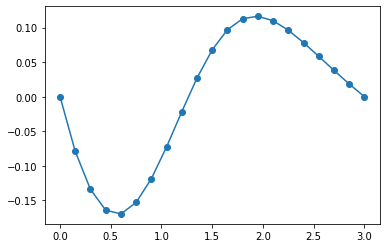

array([0, -16694/210425, -107878/802603, -160697/977522, -35042/206279,
       -71715/467902, -98947/832181, -12604/173223, -14471/663270,
       26483/980981, 60919/897565, 5241/54032, 107830/954617,
       18601/159641, 4259/38726, 46049/478215, 24147/308287, 47123/807137,
       31837/836096, 16883/916405, 0])

In [3]:
finite_difference(t0=0, tf=3, p=lambda t: t ** 2, q=lambda t: 1, r=lambda t: np.cos(t), alpha=0, beta=0, N=19)

In [4]:
v1, v2 = gram_schmidt(np.array([[-3, 1], [1, 1], [2, 0]]))
print(v1, v2)

[-3 1 2] [4/7 8/7 2/7]


In [5]:
fundamental_subspace(Matrix([[1, 0, -4, -3], [-2, 1, 13, 5], [0, 1, 5, -1]]))

Column space of A =
⎡⎡1 ⎤  ⎡0⎤⎤
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢-2⎥, ⎢1⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎣⎣0 ⎦  ⎣1⎦⎦
Null space of A =
⎡⎡4 ⎤  ⎡3⎤⎤
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢-5⎥  ⎢1⎥⎥
⎢⎢  ⎥, ⎢ ⎥⎥
⎢⎢1 ⎥  ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎣⎣0 ⎦  ⎣1⎦⎦
Row space of A =
[[1  0  -4  -3], [0  1  5  -1]]
Left null space =
⎡⎡-2⎤⎤
⎢⎢  ⎥⎥
⎢⎢-1⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦


In [6]:
projection(np.array([-6, 4, 3]), np.array([-1, -1, 3]))

array([-1, -1, 3])

In [7]:
M = np.array([[1, 1, 0],[1, 1, 1], [0, 1, 1]])
x0 = np.array([[1],[0],[0]])

eigmax = power_method(M, x0, 4)
print(eigmax)


STEP 1
----------
Eigen Value = 1.0000
Eigen Vector: 
1.000	
1.000	
0.000	
errror=[0]

STEP 2
----------
Eigen Value = 2.0000
Eigen Vector: 
1.000	
1.000	
0.500	
errror=[1]

STEP 3
----------
Eigen Value = 2.5000
Eigen Vector: 
0.800	
1.000	
0.600	
errror=[1/2]

STEP 4
----------
Eigen Value = 2.4000
Eigen Vector: 
0.750	
1.000	
0.667	
Not convergent in given maximum iteration!
None


In [2]:
A = np.array([[1, 1, 1],[1, 2, 0], [1, 0, 3]])
x0 = np.array([[1], [0], [0]])

eigmax = power_method_about(A, x0, 500, closest=3)
print(eigmax)

[[1]
 [0]
 [0]]


In [59]:
A = np.array([[2], [-3], [1]])
P = projection_matrix(A)
P = P
x = np.array([[0],[1], [0]])
print(P@x)

P_ = eye(3) - P

y = P_@x
print(y*14)
print(np.inner(np.array([2, -3, 1]), np.array([6, 5, 3])*(1/14)))

[[-3/7]
 [9/14]
 [-3/14]]
Matrix([[6.00000000000000], [5.00000000000000], [3.00000000000000]])
1.942890293094024e-16
